# Image Classification of Cars Using Convolutional Neural Network
- Member:
  - Rachel Filderman - raf2dh
  - Jae Yoon Sung - js2yp
  - Congxin (David) Xu - cx2rx
## Final Model Implementation
- Model: Xception
- Pooling: Average
- Momentum Decay: 0.6



## Import Modules

In [ ]:
import pandas
import google.colab
from sklearn.datasets import load_files 
from keras.utils import np_utils
from keras.preprocessing import image
from tqdm import tqdm # progress bar
import tensorflow as tf
import matplotlib.pyplot as plt
import os

## Connect Kaggle with Google Colab
- https://github.com/Kaggle/kaggle-api#api-credentials
- https://www.kaggle.com/general/74235

In [ ]:
# Upload your kaggle.json API file
google.colab.files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"godlikecoder","key":"2b8b8cdc7b25d32c9fc4d69491a88cab"}'}

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder

100% 1.82G/1.83G [00:29<00:00, 68.1MB/s]
100% 1.83G/1.83G [00:29<00:00, 67.4MB/s]


In [ ]:
! unzip stanford-car-dataset-by-classes-folder.zip -d kaggle

Streaming output truncated to the last 5000 lines.
  inflating: kaggle/car_data/car_data/train/Chrysler Aspen SUV 2009/04381.jpg  
  inflating: kaggle/car_data/car_data/train/Chrysler Aspen SUV 2009/04688.jpg  
  inflating: kaggle/car_data/car_data/train/Chrysler Aspen SUV 2009/04772.jpg  
  inflating: kaggle/car_data/car_data/train/Chrysler Aspen SUV 2009/05544.jpg  
  inflating: kaggle/car_data/car_data/train/Chrysler Aspen SUV 2009/05728.jpg  
  inflating: kaggle/car_data/car_data/train/Chrysler Aspen SUV 2009/05860.jpg  
  inflating: kaggle/car_data/car_data/train/Chrysler Aspen SUV 2009/06146.jpg  
  inflating: kaggle/car_data/car_data/train/Chrysler Aspen SUV 2009/06157.jpg  
  inflating: kaggle/car_data/car_data/train/Chrysler Aspen SUV 2009/06332.jpg  
  inflating: kaggle/car_data/car_data/train/Chrysler Aspen SUV 2009/06441.jpg  
  inflating: kaggle/car_data/car_data/train/Chrysler Aspen SUV 2009/06447.jpg  
  inflating: kaggle/car_data/car_data/train/Chrysler Aspen SUV 2009/0

In [ ]:
# Load Class Names
names = pandas.read_csv('/content/kaggle/names.csv', header=None)
class_names = names.values.flatten()

## Explortory Data Analysis

Found 8144 files belonging to 196 classes.
Found 8041 files belonging to 196 classes.


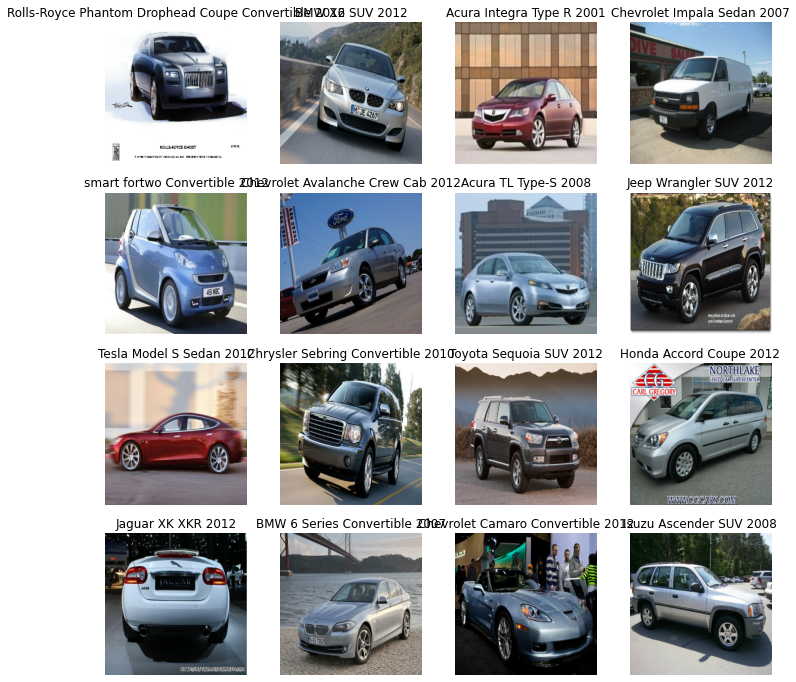

In [ ]:
# Load Class Names
names = pandas.read_csv('/content/kaggle/names.csv', header=None)
class_names = names.values.flatten()

data_dir = "/content/kaggle/car_data/car_data"
batch_size = 32;

# IMPORTANT: Depends on what pre-trained model you choose, 
#   you will need to change these dimensions accordingly
img_height = 299; 
img_width = 299;

# Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + '/train',
    image_size= (img_height, img_width),
    batch_size = batch_size
)

# Validation Dataset
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir+ '/test',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

# Preview some pictures
n_rows = 4
n_cols = 4
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize = 12)
plt.subplots_adjust(wspace=.2, hspace=.2)

## Experiment 2: Xception with Batch Size 32 with No DA


In [ ]:
# Clear Session
tf.keras.backend.clear_session()

# Model Set Up
model = tf.keras.applications.Xception(weights='imagenet', 
                                       include_top=False, 
                                       pooling = 'avg')

# Adding Additional Layers
# avg = tf.keras.layers.GlobalAveragePooling2D()(model.output)
output = tf.keras.layers.Dense(len(class_names), activation='softmax')(model.output)
model = tf.keras.Model(inputs = model.input, outputs = output)

# model.summary()

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
# Learning Rate Schedule
def lr_schedule(epoch):
  lrate = 0.001
  if epoch > 10:
    lrate = 0.0005
  if epoch > 20:
    lrate = 0.0001
  return lrate

# Define the number of training layers
for layer in model.layers:
  layer.trainable = True

# Model Compile
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(beta_1 = 0.6),
              metrics = ['accuracy'])

# Call back early stop and learning rate schedule
callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                             patience = 10,
                                             restore_best_weights = False) \
            , tf.keras.callbacks.LearningRateScheduler(lr_schedule, verbose=0)]

# Fit the History
history = model.fit(train_ds, 
                    validation_data = validation_ds,
                    epochs = 100, 
                    callbacks = callback)

Epoch 1/100
255/255 [==============================] - 311s 1s/step - loss: 4.1518 - accuracy: 0.1348 - val_loss: 2.1502 - val_accuracy: 0.4228
Epoch 2/100
255/255 [==============================] - 287s 1s/step - loss: 1.1105 - accuracy: 0.6872 - val_loss: 1.2407 - val_accuracy: 0.6524
Epoch 3/100
255/255 [==============================] - 287s 1s/step - loss: 0.4214 - accuracy: 0.8732 - val_loss: 1.3388 - val_accuracy: 0.6525
Epoch 4/100
255/255 [==============================] - 286s 1s/step - loss: 0.2583 - accuracy: 0.9276 - val_loss: 1.0749 - val_accuracy: 0.7367
Epoch 5/100
255/255 [==============================] - 285s 1s/step - loss: 0.2268 - accuracy: 0.9352 - val_loss: 2.2714 - val_accuracy: 0.5293
Epoch 6/100
255/255 [==============================] - 288s 1s/step - loss: 0.1751 - accuracy: 0.9454 - val_loss: 1.4454 - val_accuracy: 0.6568
Epoch 7/100
255/255 [==============================] - 287s 1s/step - loss: 0.1469 - accuracy: 0.9560 - val_loss: 1.6225 - val_accuracy:

In [ ]:
# Evaluation
model.evaluate(validation_ds)

252/252 [==============================] - 69s 270ms/step - loss: 0.4891 - accuracy: 0.8949


[0.4891301691532135, 0.8949135541915894]